聚类模型是试图检测未标记数据中模式的无监督方法。聚类算法主要有两类：聚集聚类将相似的数据点连接在一起，而质心聚类则试图在数据中找到中心或分区。Yellowbrick提供yellowbrick.cluster用于可视化和评估群集行为的模块。目前，我们提供了几种可视化工具来评估质心机制，特别是K均值聚类，帮助我们发现聚类度量中的最佳K参数：
+ Elbow Method：根据某个评分函数对聚类进行可视化，在曲线中寻找“Elbow”。
+ Silhouette Visualize：在一个模型中可视化每个集群的轮廓分数。
+ Intercluster Distance：可视化簇的相对距离和大小。

本文如果数据集下载不下来，查看下面地址，然后放入yellowbrick安装目录\datasets\fixtures文件夹:


```
{
  "bikeshare": {
    "url": "https://s3.amazonaws.com/ddl-data-lake/yellowbrick/v1.0/bikeshare.zip",
    "signature": "4ed07a929ccbe0171309129e6adda1c4390190385dd6001ba9eecc795a21eef2"
  },
  "hobbies": {
    "url": "https://s3.amazonaws.com/ddl-data-lake/yellowbrick/v1.0/hobbies.zip",
    "signature": "6114e32f46baddf049a18fb05bad3efa98f4e6a0fe87066c94071541cb1e906f"
  },
  "concrete": {
    "url": "https://s3.amazonaws.com/ddl-data-lake/yellowbrick/v1.0/concrete.zip",
    "signature": "5807af2f04e14e407f61e66a4f3daf910361a99bb5052809096b47d3cccdfc0a"
  },
  "credit": {
    "url": "https://s3.amazonaws.com/ddl-data-lake/yellowbrick/v1.0/credit.zip",
    "signature": "2c6f5821c4039d70e901cc079d1404f6f49c3d6815871231c40348a69ae26573"
  },
  "energy": {
    "url": "https://s3.amazonaws.com/ddl-data-lake/yellowbrick/v1.0/energy.zip",
    "signature": "174eca3cd81e888fc416c006de77dbe5f89d643b20319902a0362e2f1972a34e"
  },
  "game": {
    "url": "https://s3.amazonaws.com/ddl-data-lake/yellowbrick/v1.0/game.zip",
    "signature": "ce799d1c55fcf1985a02def4d85672ac86c022f8f7afefbe42b20364fba47d7a"
  },
  "mushroom": {
    "url": "https://s3.amazonaws.com/ddl-data-lake/yellowbrick/v1.0/mushroom.zip",
    "signature": "f79fdbc33b012dabd06a8f3cb3007d244b6aab22d41358b9aeda74417c91f300"
  },
  "occupancy": {
    "url": "https://s3.amazonaws.com/ddl-data-lake/yellowbrick/v1.0/occupancy.zip",
    "signature": "0b390387584586a05f45c7da610fdaaf8922c5954834f323ae349137394e6253"
  },
  "spam": {
    "url": "https://s3.amazonaws.com/ddl-data-lake/yellowbrick/v1.0/spam.zip",
    "signature": "000309ac2b61090a3001de3e262a5f5319708bb42791c62d15a08a2f9f7cb30a"
  },
  "walking": {
    "url": "https://s3.amazonaws.com/ddl-data-lake/yellowbrick/v1.0/walking.zip",
    "signature": "7a36615978bc3bb74a2e9d5de216815621bd37f6a42c65d3fc28b242b4d6e040"
  },
  "nfl": {
    "url": "https://s3.amazonaws.com/ddl-data-lake/yellowbrick/v1.0/nfl.zip",
    "signature": "4989c66818ea18217ee0fe3a59932b963bd65869928c14075a5c50366cb81e1f"
  }
}
```

In [1]:
# 多行输出
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# 1 Elbow Method
KElbowVisualizer实现了“肘部”方法，以帮助数据科学家通过用K的一系列值拟合模型来选择最佳的簇数。如果折线图类似于手臂，则“肘部”（曲线上的拐点）是一个很好的指示，表明基础模型在该点最适合。在可视化工具中，“弯头”将用虚线注释。

|可视化器|KElbowVisualizer|
|-|-|
|快速使用方法|kelbow_visualizer()|
|模型|聚类|
|工作流程|模型评估|

为了证明这一点，在下面的例子中，KElbowVisualizer在一个包含8个随机点簇的二维数据集上拟合KMeans模型，该模型的K值范围从4到11。当模型适合8个簇时，我们可以看到一条线在图中注释“弯头”，在本例中我们知道这是最佳数目。


## 1.1 基础使用

In [2]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from yellowbrick.cluster import KElbowVisualizer

# Generate synthetic dataset with 8 random clusters
# 建立具有8个随机点簇中心的数据
X, y = make_blobs(n_samples=1000, n_features=12, centers=8, random_state=42)

# Instantiate the clustering model and visualizer
model = KMeans()
# 可视化
visualizer = KElbowVisualizer(model, k=(4,12))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show();        # Finalize and render the figure

<Figure size 800x550 with 2 Axes>

默认情况下，评分参数度量metric设置为distortion，这将计算从每个点到其指定中心的平方距离之和。
但是，KElbowVisualizer还可以使用另外两个指标-sihouette和calinski_harabasz。
silhouette计算所有采样的平均轮廓系数，而calinski_harabasz分数计算簇之间和簇内的分散率。

KElbowVisualizer还将每K训练聚类模型的时间量显示为一条绿色虚线，但可以通过设置timings=False来隐藏。在下面的示例中，我们将使用calinski_harabasz分数并隐藏时间以适合模型。


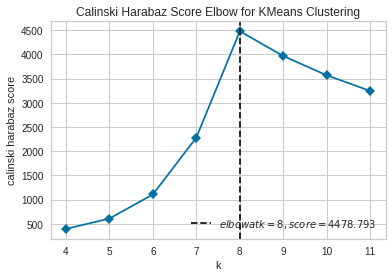

In [3]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from yellowbrick.cluster import KElbowVisualizer

# Generate synthetic dataset with 8 random clusters
X, y = make_blobs(n_samples=1000, n_features=12, centers=8, random_state=42)

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(
    model, k=(4,12), metric='calinski_harabasz', timings=False
)

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show();        # Finalize and render the figure

默认情况下，参数locate_elbow设置为True，使用“elbow检测算法”自动找到可能与k的最佳值相对应的“肘”。但是，用户可以通过设置关闭功能locate_elbow=False。您可以在 Kevin Arvai的[Knee point detection in Python](https://github.com/arvkevi/kneed)中阅读有关此算法的实现的信息。

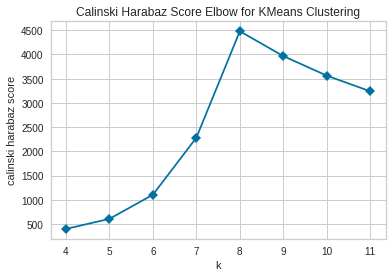

In [4]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from yellowbrick.cluster import KElbowVisualizer

# Generate synthetic dataset with 8 random clusters
X, y = make_blobs(n_samples=1000, n_features=12, centers=8, random_state=42)

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(
    model, k=(4,12), metric='calinski_harabasz', timings=False, locate_elbow=False
)

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show();        # Finalize and render the figure

重要的是要记住，如果数据不是非常聚集，那么“肘部”方法就不能很好地工作。在这种情况下，您可能会看到一条平滑的曲线，而K的最佳值将不清楚。

## 1.2 快速方法
上面的相同功能可以通过关联的快速方法来实现kelbow_visualizer。此方法将KElbowVisualizer使用关联的参数构建对象，将其拟合，然后（可选）立即显示可视化效果。

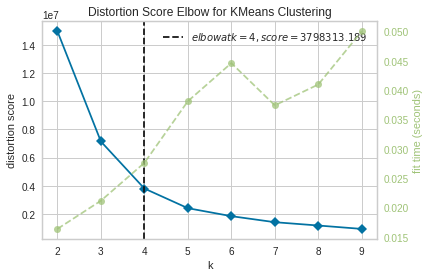

In [5]:
from sklearn.cluster import KMeans
from yellowbrick.cluster.elbow import kelbow_visualizer
from yellowbrick.datasets.loaders import load_nfl

X, y = load_nfl()

# Use the quick method and immediately show the figure
kelbow_visualizer(KMeans(random_state=4), X, k=(2,10));

# 2 Silhouette Visualiz
当数据集的实际情况未知时，使用轮廓系数来计算聚类密度。通过平均每个样本的轮廓系数来计算得分，计算为每个样本的平均簇内距离和平均最近聚类距离之间的差，用最大值归一化。这将产生一个介于1和-1之间的分数，其中1是高度密集的簇，而-1是完全不正确的聚类。


|可视化器|SilhouetteVisualizer|
|-|-|
|快速使用方法|silhouette_visualizer()|
|模型|聚类|
|工作流程|模型评估|


## 2.1 基础使用
红线表示平均Silhouette分数，纵坐标表示当前特征的分数

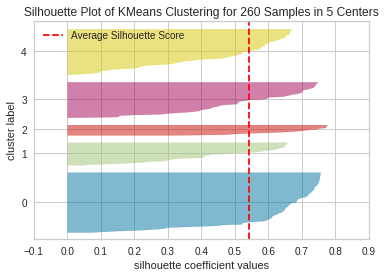

In [6]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.datasets import load_nfl

# Load a clustering dataset
X, y = load_nfl()

# Specify the features to use for clustering
# 指定某五个特征
features = ['Rec', 'Yds', 'TD', 'Fmb', 'Ctch_Rate']
# 挑选这些特征重tgb>20的数据
X = X.query('Tgt >= 20')[features]

# Instantiate the clustering model and visualizer
model = KMeans(5, random_state=42)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show();        # Finalize and render the figure

## 2.2 快速方法
上面的相同功能可以通过关联的快速方法silhouette_visualizer来实现。此方法将使用关联的参数构建Silhouette Visualizer对象，将其拟合，然后（可选）立即显示它。

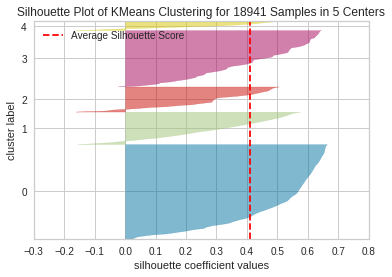

In [7]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import silhouette_visualizer
from yellowbrick.datasets import load_credit

# Load a clustering dataset
X, y = load_credit()

# Specify rows to cluster: under 40 y/o and have either graduate or university education
X = X[(X['age'] <= 40) & (X['edu'].isin([1,2]))]

# Use the quick method and immediately show the figure
silhouette_visualizer(KMeans(5, random_state=42), X, colors='yellowbrick');

# 3 Intercluster Distance
簇间距离图在保留到其他中心的距离的情况下，在2维中显示簇中心的嵌入。
例如，可视化中元素离中心越近，它们在原始特征空间中的距离就越近。
根据评分度量调整群集的大小。
默认情况下，它们的大小取决于membership，例如，属于每个中心的实例数量。
这让人感觉到集群的相对重要性。
但是，请注意，由于两个簇在2D空间中重叠，这并不意味着它们在原始特征空间中重叠。


|可视化器|InterclusterDistance|
|-|-|
|快速使用方法|intercluster_distance()|
|模型|聚类|
|工作流程|模型评估|



## 3.1 基础使用

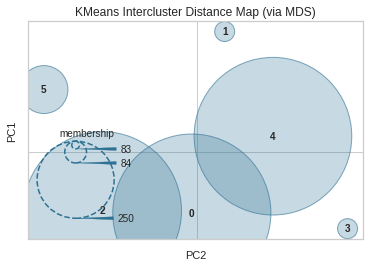

In [8]:

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from yellowbrick.cluster import InterclusterDistance

# Generate synthetic dataset with 12 random clusters
X, y = make_blobs(n_samples=1000, n_features=12, centers=12, random_state=42)

# Instantiate the clustering model and visualizer
# 六个簇类
model = KMeans(6)
visualizer = InterclusterDistance(model)

visualizer.fit(X)        # Fit the data to the visualizer|
visualizer.show();       # Finalize and render the figure

## 3.2 快速方法
上面的相同功能可以通过关联的快速方法intercluster_distance实现。此方法将InterclusterDistance使用关联的参数构建对象，将其拟合，然后（可选）立即显示它。

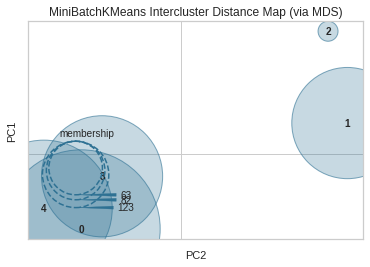

In [9]:
from yellowbrick.datasets import load_nfl
from sklearn.cluster import MiniBatchKMeans
from yellowbrick.cluster import intercluster_distance


X, _ = load_nfl()
intercluster_distance(MiniBatchKMeans(5, random_state=777), X);

# 4 参考
[https://www.scikit-yb.org/en/latest/api/cluster/elbow.html](https://www.scikit-yb.org/en/latest/api/cluster/elbow.html)

[https://www.scikit-yb.org/en/latest/api/cluster/silhouette.html](https://www.scikit-yb.org/en/latest/api/cluster/silhouette.html)

[https://www.scikit-yb.org/en/latest/api/cluster/icdm.html#yellowbrick.cluster.icdm.InterclusterDistance](https://www.scikit-yb.org/en/latest/api/cluster/icdm.html#yellowbrick.cluster.icdm.InterclusterDistance)